## 1. Importing libraries

In [1]:
import keras
keras.__version__
from keras.preprocessing.image import ImageDataGenerator
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import os
import cv2
import random
import re

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

from keras.preprocessing import sequence
from keras.layers import TimeDistributed
from keras.layers import AveragePooling1D
from keras.layers import Conv1D
from keras.models import load_model
from keras.layers import Input, Lambda, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard,CSVLogger
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
seed(101)
from tensorflow import set_random_seed
set_random_seed(101)

## 2. Sampling the data for balanced classes and splitting into train and validation

In [6]:
train_dir="C:\\Users\\shett\\Cancer_data\\train_images\\"

In [7]:
validation_dir="C:\\Users\\shett\\Cancer_data\\test_images\\"

In [8]:
df=pd.read_csv("C:\\Users\\shett\\Cancer_data\\train_labels\\train_labels.csv")

In [9]:
df.head(5)

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [10]:
not_tumor=df[df.label==0].sample(85000)
tumor=df[df.label==1].sample(85000)

In [11]:
not_tumor.shape
tumor.shape

(85000, 2)

(85000, 2)

In [12]:
new_df=pd.concat([not_tumor,tumor],axis=0).reset_index(drop=True)

In [13]:
new_df=shuffle(new_df)
new_df.shape

(170000, 2)

In [14]:
new_df.head()

,id,label
168933,05c8cad3a5472ff1d25b00248c143efa245b44cb,1
46832,f4eccf52c1b36088483fe1b77cdc8dba8b46fdbc,0
105427,f5e00dfa8d9cd8bb3a21b336f1c1e32177ed4172,1
131025,b44c61d9b5d3b651eb6ac570bc1b3f8352bd6fc0,1
17640,1e46e949f51c3adbe0592f69b5f344e3dddc2dfb,0


In [15]:
train_data,val_data=train_test_split(new_df, test_size=0.15, random_state=31, stratify=new_df.label) #Stratify makes sure that the same proportion of labels is maintained in test as well as validation

In [16]:
train_data.shape
val_data.shape

(144500, 2)

(25500, 2)

## 3. Creating directories for training and validation

In [ ]:
root="C:\\Users\\shett\Cancer_data"

train_directory = os.path.join(root, 'train_images')
os.mkdir(train_directory)

val_directory = os.path.join(root, 'val_images')
os.mkdir(val_directory)


#For training images
not_tumor = os.path.join(train_directory, 'not_tumor')
os.mkdir(not_tumor)
tumor = os.path.join(train_directory, 'tumor')
os.mkdir(tumor)


#For validation images
not_tumor2 = os.path.join(val_directory, 'not_tumor')
os.mkdir(not_tumor2)
tumor2 = os.path.join(val_directory, 'tumor')
os.mkdir(tumor2)

In [ ]:
os.listdir(val_directory)

## 4. Move the images in the appropriate folders

### To training folder

In [17]:
train_data.head(2)

,id,label
152379,556213f1169aa7cd1e2f023288009761ac017937,1
59020,ad6dece5fe00e8266ee5a695052a025245ffed90,0


#### Examples of tumor images

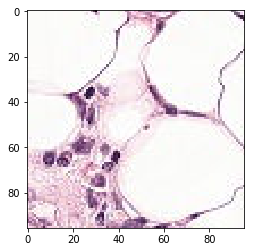

In [160]:
plt.imshow(plt.imread('{}\\tumor\\556213f1169aa7cd1e2f023288009761ac017937.tif'.format(train_directory)))

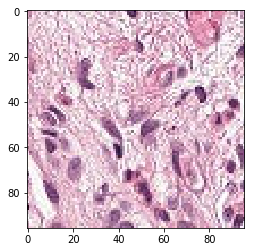

In [147]:
plt.imshow(plt.imread('{}\\tumor\\9e11790ecaae679d383bedbfcff9831b491eaaab.tif'.format(train_directory)))

#### Example of non - tumor images

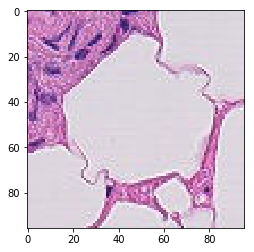

In [164]:
plt.imshow(plt.imread('{}\\not_tumor\\3f0e0c769818e83dd0bf0ce99facc013646e4429.tif'.format(train_directory)))

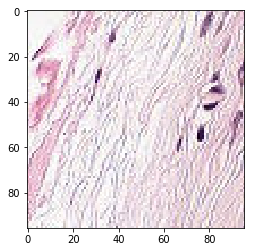

In [150]:
plt.imshow(plt.imread('{}\\not_tumor\\74f4911f88a3aa200ed43dc57bea23b0d39c1753.tif'.format(train_directory)))

In [18]:
train_data['id']= train_data.id + '.tif'

C:\Users\shett\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
train_data.head(2)

,id,label
152379,556213f1169aa7cd1e2f023288009761ac017937.tif,1
59020,ad6dece5fe00e8266ee5a695052a025245ffed90.tif,0


In [20]:
train_data['label_text']=np.where(train_data.label==1,'tumor','not_tumor')

C:\Users\shett\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
train_data.head(2)

,id,label,label_text
152379,556213f1169aa7cd1e2f023288009761ac017937.tif,1,tumor
59020,ad6dece5fe00e8266ee5a695052a025245ffed90.tif,0,not_tumor


In [ ]:
train_directory
val_directory

In [ ]:
extract="C:\\Users\\shett\Cancer_data\\train"

In [ ]:
for index,row in train_data.iterrows():
    old_destination=os.path.join(extract,row.id)
    
    new_destination=os.path.join(train_directory,row.label_text, row.id)
    
    shutil.copyfile(old_destination, new_destination)

### To validation folder

In [25]:
val_data.head(2)
val_data['id']= val_data.id + '.tif'
val_data.head(2)

,id,label
26282,6680fe8789458122be9311c65f520c7c02bffe5b,0
70503,ec02d90f99d441768f869dc4c38a558ff41f0703,0


C:\Users\shett\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,label
26282,6680fe8789458122be9311c65f520c7c02bffe5b.tif,0
70503,ec02d90f99d441768f869dc4c38a558ff41f0703.tif,0


In [26]:
val_data['label_text']=np.where(val_data.label==1,'tumor','not_tumor')
val_data.head(2)

C:\Users\shett\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,label,label_text
26282,6680fe8789458122be9311c65f520c7c02bffe5b.tif,0,not_tumor
70503,ec02d90f99d441768f869dc4c38a558ff41f0703.tif,0,not_tumor


In [ ]:
for index,row in val_data.iterrows():
    old_destination2=os.path.join(extract,row.id)
    
    new_destination2=os.path.join(val_directory,row.label_text, row.id)
    
    shutil.copyfile(old_destination2, new_destination2)

In [27]:
print(len(os.listdir("C:\\Users\\shett\\Cancer_data\\train_images\\not_tumor")))

72250


## 5. Data augmentation of images and conversion to tensors

In [45]:
train_directory="C:\\Users\\shett\\Cancer_data\\train_images"
val_directory="C:\\Users\\shett\\Cancer_data\\val_images"
test_directory="C:\\Users\\shett\\Cancer_data\\test_images"

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


val_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


In [52]:
train_generator = train_datagen.flow_from_directory(
        train_directory,
        target_size=(96, 96),
        batch_size=5,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        val_directory,
        target_size=(96, 96),
        batch_size=5,
        class_mode='categorical')


Found 144500 images belonging to 2 classes.
Found 25500 images belonging to 2 classes.


In [53]:
test_generator = test_datagen.flow_from_directory(
        val_directory,
        target_size=(96, 96),
        batch_size=1,
        class_mode='categorical',shuffle=False)

Found 25500 images belonging to 2 classes.


In [54]:
train_steps = np.ceil(len(train_data) / 5)
val_steps = np.ceil(len(val_data) / 5)

## 6. Model compilation and training

In [40]:
#Inspiration of the design of the model from https://www.kaggle.com/fmarazzi/baseline-keras-cnn-roc-fast-5min-0-8253-lb

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (96, 96, 3)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(2, activation = "softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 92, 92, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 43, 43, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 41, 41, 64)        36928     
__________

In [41]:
model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [42]:
checkpoint = ModelCheckpoint('cancer_new.h5', monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

In [55]:
history = model.fit_generator(train_generator, steps_per_epoch=train_steps, 
                    validation_data=val_generator,
                    validation_steps=val_steps,
                    epochs=5, verbose=1,
                   callbacks=[checkpoint])

Epoch 1/5
28900/28900 [==============================] - 15786s 546ms/step - loss: 0.4381 - acc: 0.7995 - val_loss: 0.3887 - val_acc: 0.8320

Epoch 00001: val_acc improved from -inf to 0.83204, saving model to cancer_new.h5
Epoch 2/5
28900/28900 [==============================] - 8844s 306ms/step - loss: 0.3581 - acc: 0.8432 - val_loss: 0.3948 - val_acc: 0.8259

Epoch 00002: val_acc did not improve from 0.83204
Epoch 3/5
28900/28900 [==============================] - 8863s 307ms/step - loss: 0.3218 - acc: 0.8627 - val_loss: 0.3485 - val_acc: 0.8451

Epoch 00003: val_acc improved from 0.83204 to 0.84514, saving model to cancer_new.h5
Epoch 4/5
28900/28900 [==============================] - 9085s 314ms/step - loss: 0.3031 - acc: 0.8720 - val_loss: 0.3319 - val_acc: 0.8523

Epoch 00004: val_acc improved from 0.84514 to 0.85231, saving model to cancer_new.h5
Epoch 5/5
28900/28900 [==============================] - 8880s 307ms/step - loss: 0.2885 - acc: 0.8797 - val_loss: 0.3007 - val_acc: 

In [56]:
model.metrics_names

['loss', 'acc']

In [59]:
val_loss, val_acc = model.evaluate_generator(test_generator, 
                        steps=len(val_data))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 0.30025689363840674
val_acc: 0.8746666666666667


In [61]:
predictions =model.predict_generator(test_generator, steps=len(val_data), verbose=1)

25500/25500 [==============================] - 507s 20ms/step


In [62]:
pred_data = pd.DataFrame(predictions, columns=['not_tumor', 'tumor'])

pred_data.head()

,not_tumor,tumor
0,0.963075,0.036925
1,0.918253,0.081747
2,0.970330,0.029670
3,0.803935,0.196065
4,0.752873,0.247128


In [63]:
roc_auc_score(test_generator.classes, pred_data['tumor'])

0.9580585713187237

In [70]:
confusion_matrix(test_generator.classes, predictions.argmax(axis=1))

array([[10378,  2372],
       [  811, 11939]], dtype=int64)

In [76]:
print(classification_report(test_generator.classes, predictions.argmax(axis=1) , labels = [0,1]))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87     12750
           1       0.83      0.94      0.88     12750

   micro avg       0.88      0.88      0.88     25500
   macro avg       0.88      0.88      0.87     25500
weighted avg       0.88      0.88      0.87     25500



##  7. Prediction on test set images

In [78]:
test_directory

'C:\\Users\\shett\\Cancer_data\\test_images'

In [83]:
len(os.listdir("{}\\test".format(test_directory)))

57458

In [86]:
final_test_generator = ImageDataGenerator(rescale=1./255)

In [87]:
final_test_generator = final_test_generator.flow_from_directory(test_directory,
                                        target_size=(96,96),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 57458 images belonging to 1 classes.


In [88]:
final_predictions = model.predict_generator(final_test_generator, steps=57458, verbose=1)

57458/57458 [==============================] - 1160s 20ms/step


In [94]:
final_df = pd.DataFrame(final_predictions, columns=['not_tumor', 'tumor'])
final_df.head(2)

,not_tumor,tumor
0,0.043410,0.956590
1,0.046168,0.953832


In [95]:
final_df.shape

(57458, 2)

In [96]:
len(final_test_generator.filenames)

57458

In [97]:
final_df['file_location']=final_test_generator.filenames
final_df.head(2)

,not_tumor,tumor,file_location
0,0.043410,0.956590,test\00006537328c33e284c973d7b39d340809f7271b.tif
1,0.046168,0.953832,test\0000ec92553fda4ce39889f9226ace43cae3364e.tif


In [98]:
final_df.file_location.iloc[1]

'test\\0000ec92553fda4ce39889f9226ace43cae3364e.tif'

In [119]:
final_df_id=[]
for i in range(0,final_df.shape[0]):
    final_df_id.append(re.search(r'\\(.+?).tif', final_df.file_location.iloc[i]).group(1))

In [121]:
final_df['id']=final_df_id
final_df.head()

,not_tumor,tumor,file_location,id
0,0.043410,0.956590,test\00006537328c33e284c973d7b39d340809f7271b.tif,00006537328c33e284c973d7b39d340809f7271b
1,0.046168,0.953832,test\0000ec92553fda4ce39889f9226ace43cae3364e.tif,0000ec92553fda4ce39889f9226ace43cae3364e
2,0.271841,0.728159,test\00024a6dee61f12f7856b0fc6be20bc7a48ba3d2.tif,00024a6dee61f12f7856b0fc6be20bc7a48ba3d2
3,0.674547,0.325453,test\000253dfaa0be9d0d100283b22284ab2f6b643f6.tif,000253dfaa0be9d0d100283b22284ab2f6b643f6
4,0.952757,0.047243,test\000270442cc15af719583a8172c87cd2bd9c7746.tif,000270442cc15af719583a8172c87cd2bd9c7746


In [130]:
final_df.tail(10)

,not_tumor,tumor,file_location,id
57448,0.967193,0.032807,test\fffb109428e7c1ff5cfaa8ba49c657fc13828bf8.tif,fffb109428e7c1ff5cfaa8ba49c657fc13828bf8
57449,0.529126,0.470874,test\fffb3f6c8be9fb4d19245e6d5dbe003b03c70771.tif,fffb3f6c8be9fb4d19245e6d5dbe003b03c70771
57450,0.768732,0.231268,test\fffbaf2d17fc95a855fa833bd08dfc20aa18d232.tif,fffbaf2d17fc95a855fa833bd08dfc20aa18d232
57451,0.000004,0.999996,test\fffbc065982ddf01c39e4c74e62d1868551d0b25.tif,fffbc065982ddf01c39e4c74e62d1868551d0b25
57452,0.767263,0.232737,test\fffbfb279c9c378af5c362363b841a38bbee3294.tif,fffbfb279c9c378af5c362363b841a38bbee3294
57453,0.992245,0.007755,test\fffdd1cbb1ac0800f65309f344dd15e9331e1c53.tif,fffdd1cbb1ac0800f65309f344dd15e9331e1c53
57454,0.564092,0.435908,test\fffdf4b82ba01f9cae88b9fa45be103344d9f6e3.tif,fffdf4b82ba01f9cae88b9fa45be103344d9f6e3
57455,0.996349,0.003651,test\fffec7da56b54258038b0d382b3d55010eceb9d7.tif,fffec7da56b54258038b0d382b3d55010eceb9d7
57456,0.683990,0.316010,test\ffff276d06a9e3fffc456f2a5a7a3fd1a2d322c6.tif,ffff276d06a9e3fffc456f2a5a7a3fd1a2d322c6
57457,0.907327,0.092673,test\ffffeb4c0756098c7f589b7beec08ef1899093b5.tif,ffffeb4c0756098c7f589b7beec08ef1899093b5


In [140]:
submission=final_df.rename(columns={'tumor':'label'}).drop(['not_tumor','file_location'],axis=1).set_index('id')
submission.head()

,label
id,
00006537328c33e284c973d7b39d340809f7271b,0.956590
0000ec92553fda4ce39889f9226ace43cae3364e,0.953832
00024a6dee61f12f7856b0fc6be20bc7a48ba3d2,0.728159
000253dfaa0be9d0d100283b22284ab2f6b643f6,0.325453
000270442cc15af719583a8172c87cd2bd9c7746,0.047243


### Examples of predicted images

#### A) Images classified as tumor

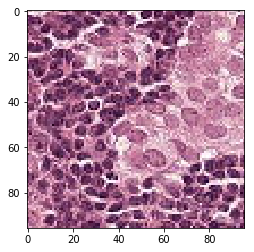

In [128]:
plt.imshow(plt.imread("{}\\test\\00006537328c33e284c973d7b39d340809f7271b.tif".format(test_directory)))

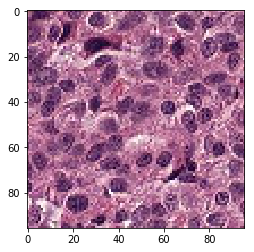

In [143]:
plt.imshow(plt.imread("{}\\test\\00573153447495d2baec1c9f64e29875915994c1.tif".format(test_directory)))

#### B) Images classified as non-tumor

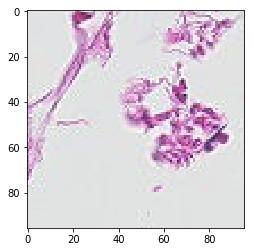

In [133]:
plt.imshow(plt.imread("{}\\test\\fffdd1cbb1ac0800f65309f344dd15e9331e1c53.tif".format(test_directory)))

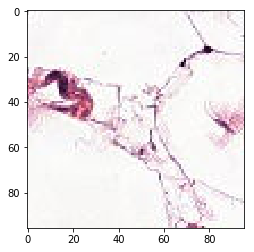

In [144]:
plt.imshow(plt.imread("{}\\test\\000c8db3e09f1c0f3652117cf84d78aae100e5a7.tif".format(test_directory)))